In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [5]:
data = pd.read_csv("C:/Users/biswa/Videos/UROP/traffic.csv")
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [6]:
# Convert the "DateTime" column in the DataFrame 'data' to datetime objects
data["DateTime"] = pd.to_datetime(data["DateTime"])

# Drop the "ID" column from the DataFrame 'data'
data = data.drop(["ID"], axis=1)

# Print information about the DataFrame 'data', including data types and non-null values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


Text(0.5, 0, 'Date')

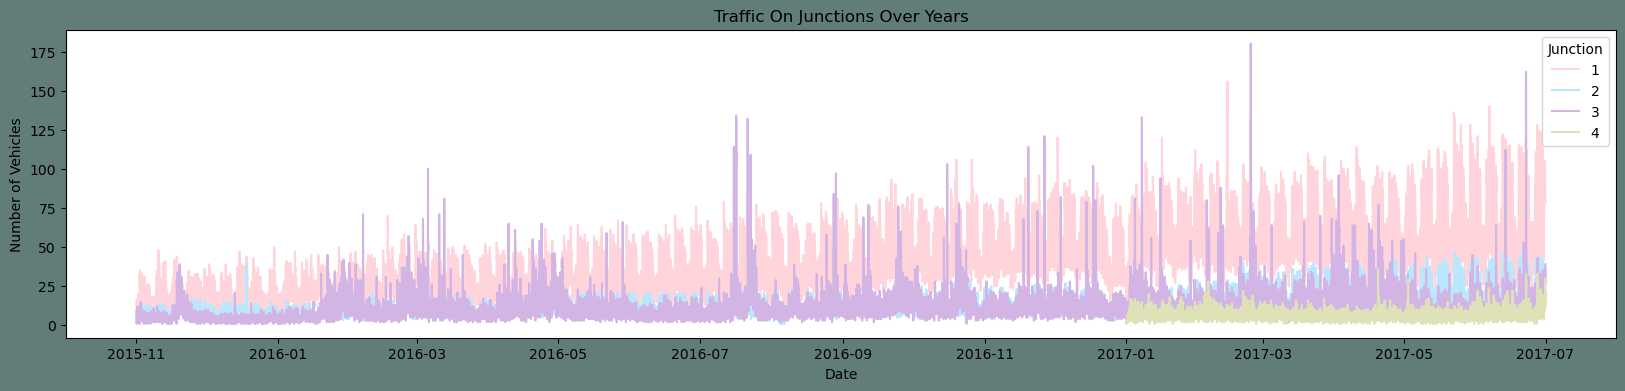

In [7]:
# Create a copy of the DataFrame 'data' and assign it to the variable 'df'
df = data.copy()

# Create a list of colors for use in the plot
colors = ["#FFD4DB", "#BBE7FE", "#D3B5E5", "#dfe2b6"]

# Create a figure for the time series plot with specific size and background color
plt.figure(figsize=(20, 4), facecolor="#627D78")

# Create a line plot (time series) using Seaborn, with the x-axis as 'DateTime', y-axis as 'Vehicles', and color-coded by 'Junction'
Time_series = sns.lineplot(x=df['DateTime'], y="Vehicles", data=df, hue="Junction", palette=colors)

# Set the title of the plot
Time_series.set_title("Traffic On Junctions Over Years")

# Set the label for the y-axis
Time_series.set_ylabel("Number of Vehicles")

# Set the label for the x-axis
Time_series.set_xlabel("Date")


In [8]:
# Create a new column "Year" in the DataFrame 'df' by extracting the year from the "DateTime" column
df["Year"] = df['DateTime'].dt.year

# Create a new column "Month" in the DataFrame 'df' by extracting the month from the "DateTime" column
df["Month"] = df['DateTime'].dt.month

# Create a new column "Date_no" in the DataFrame 'df' by extracting the day of the month from the "DateTime" column
df["Date_no"] = df['DateTime'].dt.day

# Create a new column "Hour" in the DataFrame 'df' by extracting the hour from the "DateTime" column
df["Hour"] = df['DateTime'].dt.hour

# Create a new column "Day" in the DataFrame 'df' by formatting the "DateTime" column to display the day of the week (e.g., "Monday")
df["Day"] = df['DateTime'].dt.strftime("%A")

# Display the first few rows of the modified DataFrame 'df'
df.head()


,DateTime,Junction,Vehicles,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday


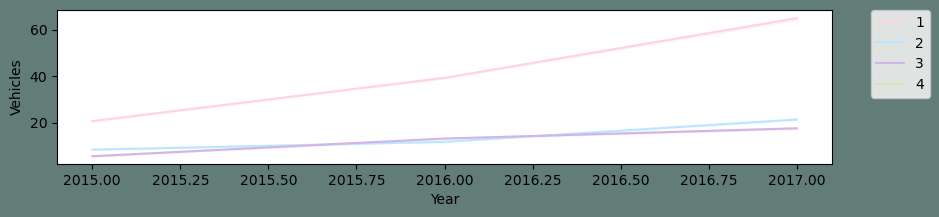

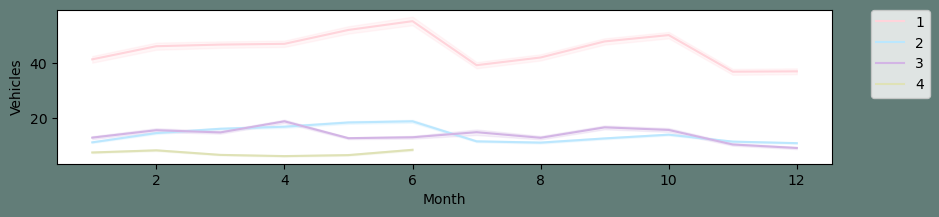

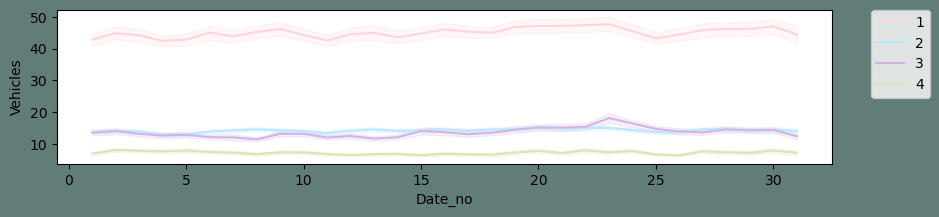

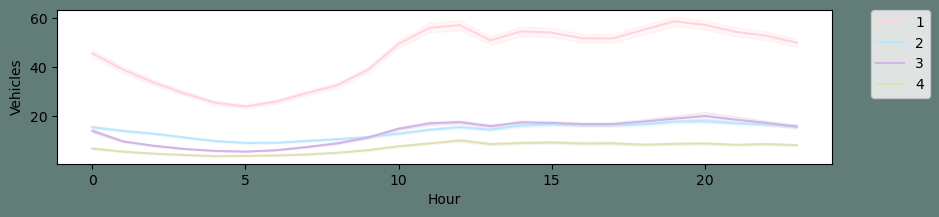

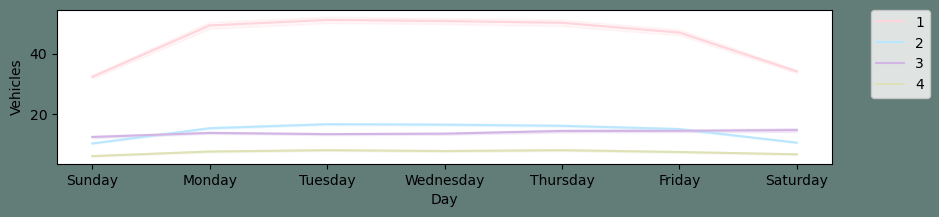

In [9]:
# Define a list of new feature columns to be used for plotting
new_features = ["Year", "Month", "Date_no", "Hour", "Day"]

# Iterate through each feature in the list
for i in new_features:
    # Create a new matplotlib figure for each feature, with a specific size and background color
    plt.figure(figsize=(10, 2), facecolor="#627D78")
    
    # Create a line plot (time series) using Seaborn, where the x-axis is the current feature 'i', the y-axis is "Vehicles", and the data is from the DataFrame 'df'
    ax = sns.lineplot(x=df[i], y="Vehicles", data=df, hue="Junction", palette=colors)
    
    # Add a legend to the plot outside the axes to label the different 'Junction' values
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Text(0.5, 0, 'Date')

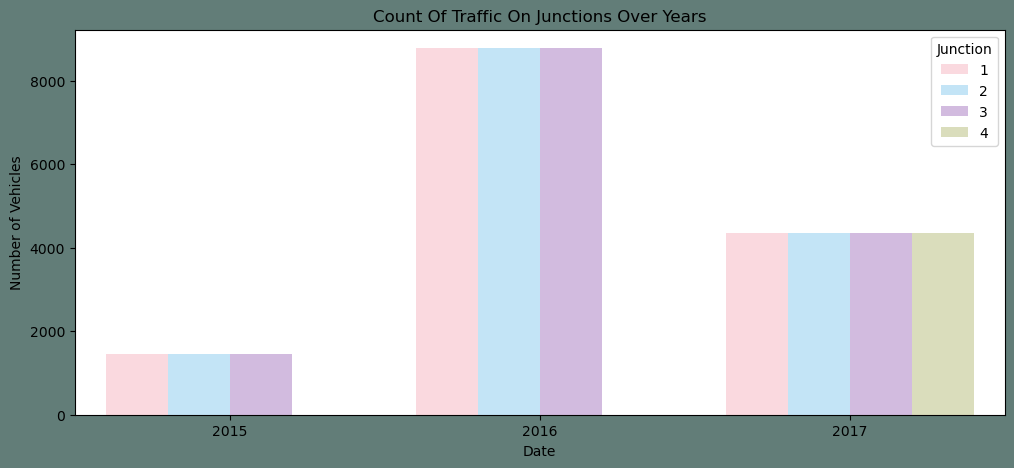

In [10]:
# Create a matplotlib figure with a specific size and background color
plt.figure(figsize=(12, 5), facecolor="#627D78")

# Create a countplot using Seaborn, counting occurrences of each year in the "Year" column, with hue for different "Junction" values and specified colors
count = sns.countplot(data=df, x=df["Year"], hue="Junction", palette=colors)

# Set the title for the countplot
count.set_title("Count Of Traffic On Junctions Over Years")

# Set the label for the y-axis
count.set_ylabel("Number of Vehicles")

# Set the label for the x-axis
count.set_xlabel("Date")


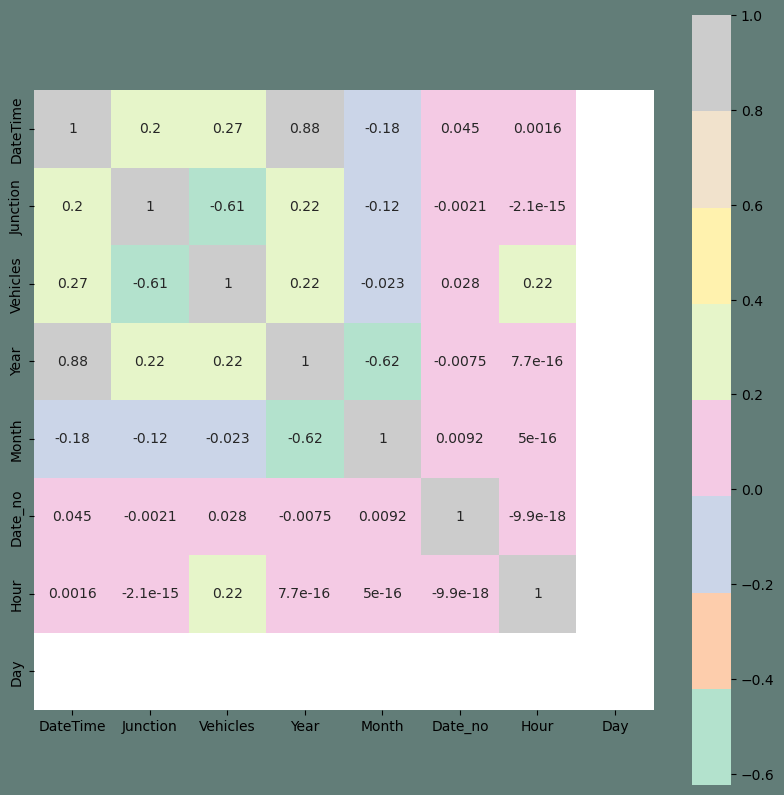

In [11]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')
# Compute correlation matrix for the numeric DataFrame
corrmat = df_numeric.corr()
# Plot heatmap
plt.subplots(figsize=(10, 10), facecolor="#627D78")
sns.heatmap(corrmat, cmap="Pastel2", annot=True, square=True)
plt.show()

C:\Users\biswa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


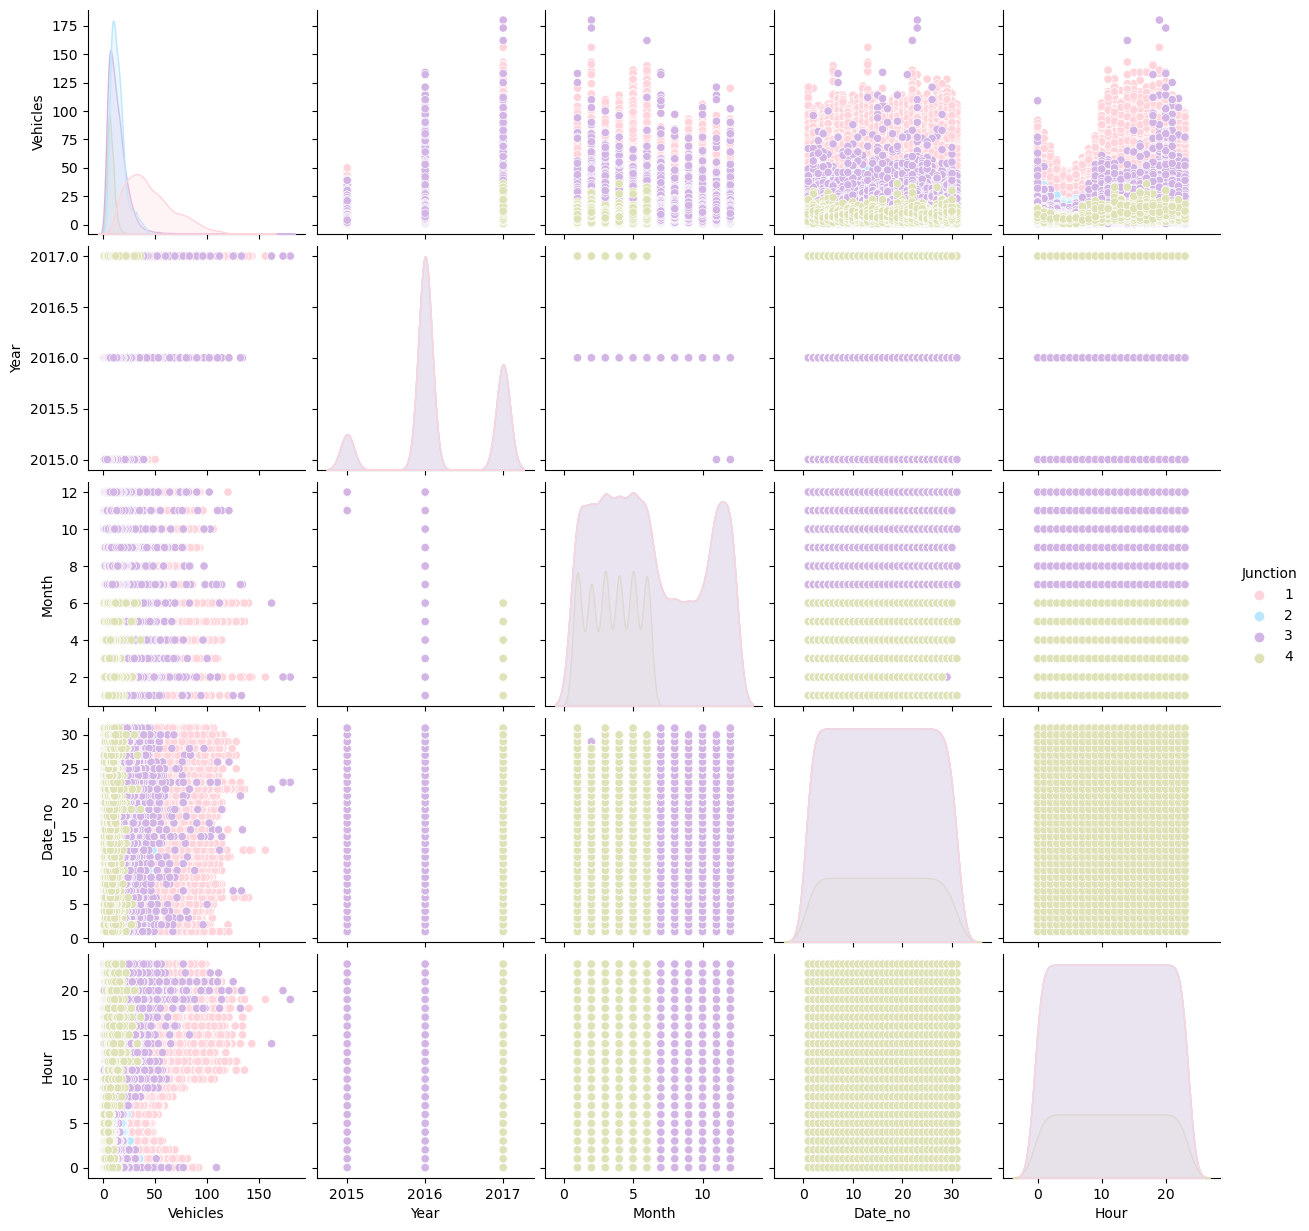

In [12]:
# Create a pairplot using Seaborn to visualize pairwise relationships between numerical columns in the DataFrame 'df'
# Differentiate the data points by the "Junction" column using the specified color palette 'colors'
sns.pairplot(data=df, hue="Junction", palette=colors)


In [13]:
# Pivot the data using the "pivot" method to reshape it based on the "Junction" and "DateTime" columns
# This will create a new DataFrame 'df_J' where each "Junction" becomes a column and "DateTime" becomes the index
df_J = data.pivot(columns="Junction", index="DateTime")

# Generate summary statistics for the pivoted DataFrame 'df_J'
# This will provide statistics like each Junction)
df_J.describe()


Vehicles                                         
Junction             1             2             3            4
count     14592.000000  14592.000000  14592.000000  4344.000000
mean         45.052906     14.253221     13.694010     7.251611
std          23.008345      7.401307     10.436005     3.521455
min           5.000000      1.000000      1.000000     1.000000
25%          27.000000      9.000000      7.000000     5.000000
50%          40.000000     13.000000     11.000000     7.000000
75%          59.000000     17.000000     18.000000     9.000000
max         156.000000     48.000000    180.000000    36.000000

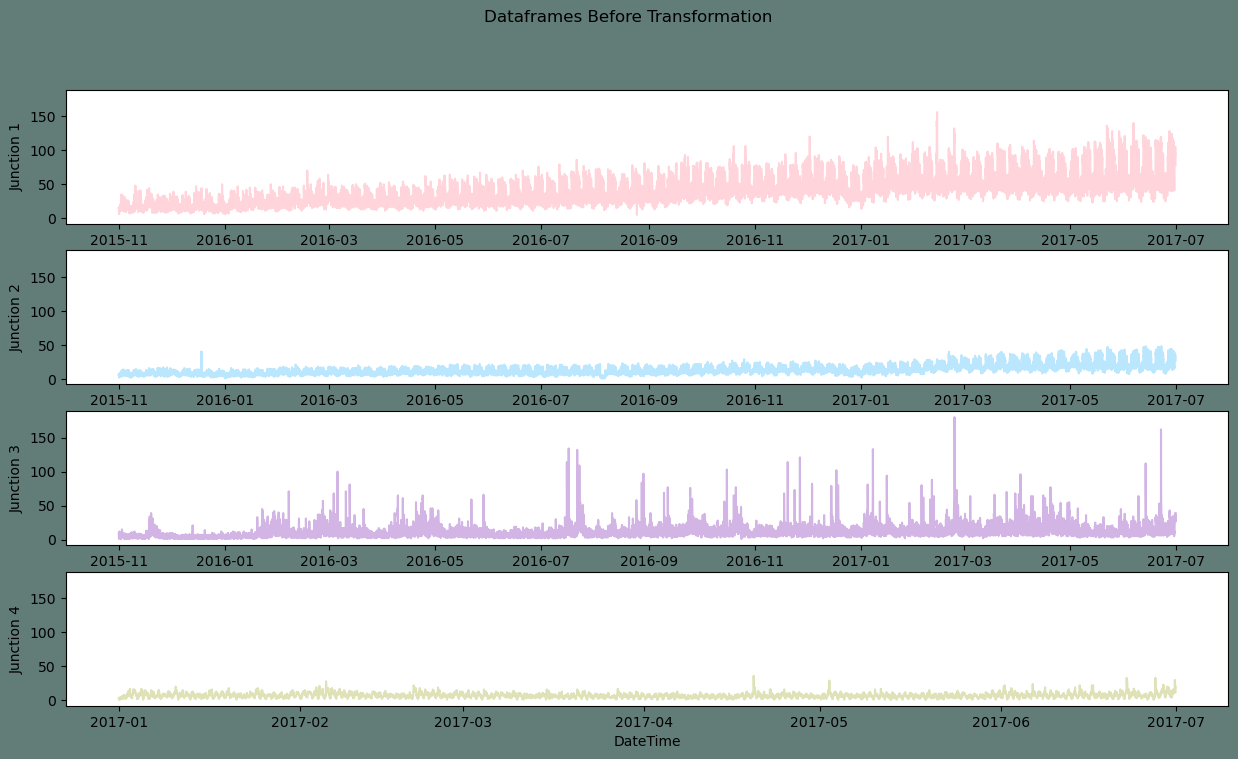

In [14]:
# Creating new dataframes from an existing dataframe 'df_J' by selecting specific columns.
# These new dataframes are meant to contain data for different junctions.
df_1 = df_J[[('Vehicles', 1)]]
df_2 = df_J[[('Vehicles', 2)]]
df_3 = df_J[[('Vehicles', 3)]]
df_4 = df_J[[('Vehicles', 4)]]

# Dropping rows with missing (NaN) values in df_4. This is done because Junction 4 has limited data.
df_4 = df_4.dropna()

# Since the original dataframe uses a multi-index, this loop is used to remove the first level of the index
# and make it a single index dataframe for each of the four new dataframes.
list_dfs = [df_1, df_2, df_3, df_4]
for i in list_dfs:
    i.columns = i.columns.droplevel(level=1)

# Define a function 'Sub_Plots4' to create subplots for comparative line plots.
def Sub_Plots4(df_1, df_2, df_3, df_4, title):
    # Create a figure with 4 subplots arranged in a 4x1 grid, with a specific size and background color.
    fig, axes = plt.subplots(4, 1, figsize=(15, 8), facecolor="#627D78", sharey=True)
    # Set the main title of the figure.
    fig.suptitle(title)

    # Create a line plot (lineplot) for each dataframe and assign it to a subplot.
    # Set different colors for each line plot.
    
    # Junction 1 plot
    pl_1 = sns.lineplot(ax=axes[0], data=df_1, color=colors[0])
    # Set the label for the y-axis of the first subplot.
    axes[0].set(ylabel="Junction 1")
    
    # Junction 2 plot
    pl_2 = sns.lineplot(ax=axes[1], data=df_2, color=colors[1])
    axes[1].set(ylabel="Junction 2")
    
    # Junction 3 plot
    pl_3 = sns.lineplot(ax=axes[2], data=df_3, color=colors[2])
    axes[2].set(ylabel="Junction 3")
    
    # Junction 4 plot
    pl_4 = sns.lineplot(ax=axes[3], data=df_4, color=colors[3])
    axes[3].set(ylabel="Junction 4")

# Call the 'Sub_Plots4' function to create comparative line plots for the four dataframes.
# Provide a title for the entire set of plots.
Sub_Plots4(df_1.Vehicles, df_2.Vehicles, df_3.Vehicles, df_4.Vehicles, "Dataframes Before Transformation")


In [15]:
# Normalize Function
def Normalize(df, col):
    # Calculate the average (mean) of the values in the specified column 'col' of the DataFrame 'df'.
    average = df[col].mean()
    
    # Calculate the standard deviation of the values in the specified column 'col' of the DataFrame 'df'.
    stdev = df[col].std()
    
    # Normalize the values in the specified column 'col' by subtracting the average and dividing by the standard deviation.
    df_normalized = (df[col] - average) / stdev
    
    # Convert the resulting normalized Series to a DataFrame.
    df_normalized = df_normalized.to_frame()
    
    # Return the normalized DataFrame, the calculated average, and the calculated standard deviation.
    return df_normalized, average, stdev

# Differencing Function
def Difference(df, col, interval):
    # Create an empty list to store the differences.
    diff = []
    # Iterate through the DataFrame 'df' starting from 'interval' to the end.
    for i in range(interval, len(df)):
        # Calculate the difference between the value at index 'i' and the value at index 'i - interval' in the specified column 'col'.
        value = df[col][i] - df[col][i - interval]
        
        # Append the calculated difference to the 'diff' list.
        diff.append(value)
    
    # Return the list of differences.
    return diff


In [16]:
#Normalize the first dataset and calculate the mean (av_J1) and standard deviation (std_J1) of the "Vehicles" column
df_N1, av_J1, std_J1 = Normalize(df_1, "Vehicles")

# Take a week's difference of the normalized data
Diff_1 = Difference(df_N1, col="Vehicles", interval=(24*7))

# Remove the first week of data since it's used for differencing
df_N1 = df_N1[24*7:]

# Rename the column to "Norm" to indicate it's normalized, and add a new column "Diff" for differenced data
df_N1.columns = ["Norm"]
df_N1["Diff"] = Diff_1

# Repeat the same process for the second dataset
df_N2, av_J2, std_J2 = Normalize(df_2, "Vehicles")
Diff_2 = Difference(df_N2, col="Vehicles", interval=(24))
df_N2 = df_N2[24:]
df_N2.columns = ["Norm"]
df_N2["Diff"] = Diff_2

# Repeat the process for the third dataset
df_N3, av_J3, std_J3 = Normalize(df_3, "Vehicles")
Diff_3 = Difference(df_N3, col="Vehicles", interval=1)
df_N3 = df_N3[1:]
df_N3.columns = ["Norm"]
df_N3["Diff"] = Diff_3

# Repeat the process for the fourth dataset
df_N4, av_J4, std_J4 = Normalize(df_4, "Vehicles")
Diff_4 = Difference(df_N4, col="Vehicles", interval=1)
df_N4 = df_N4[1:]
df_N4.columns = ["Norm"]
df_N4["Diff"] = Diff_4


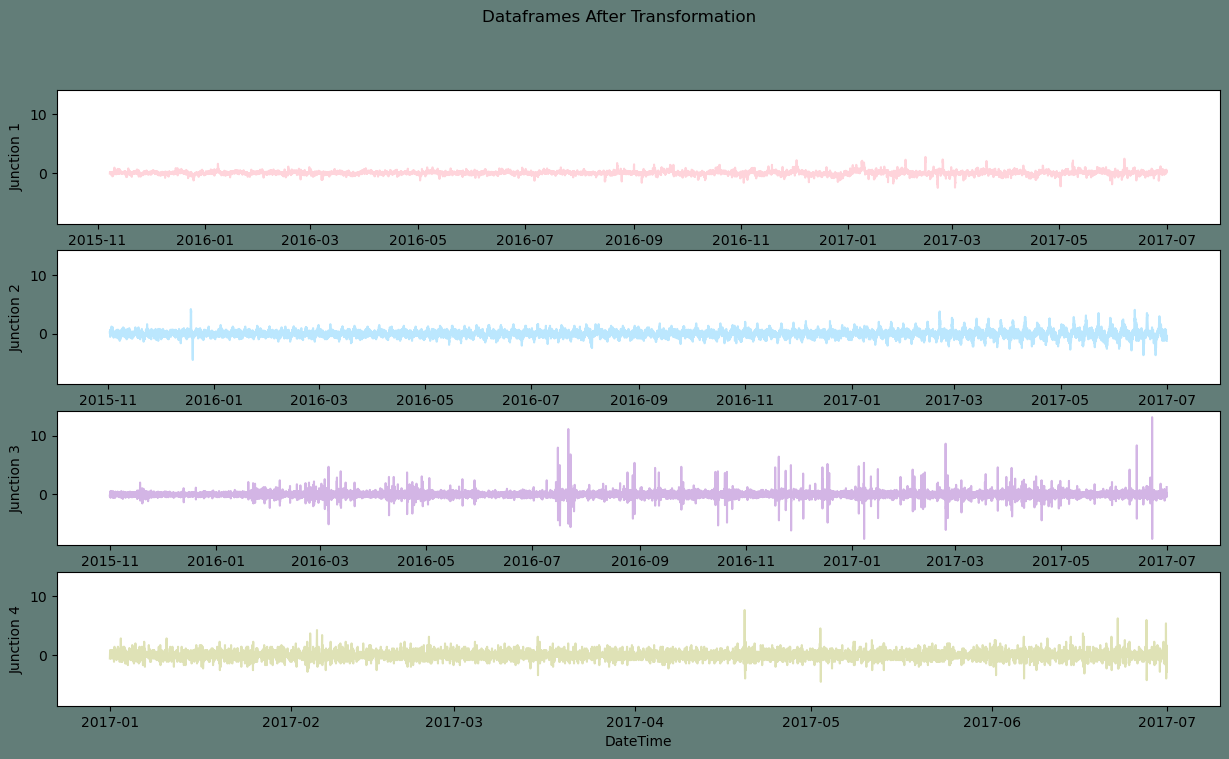

In [17]:
Sub_Plots4(df_N1.Diff, df_N2.Diff,df_N3.Diff,df_N4.Diff,"Dataframes After Transformation")

In [18]:
df = df.drop(["DateTime"], axis=1)
df.head()

,Junction,Vehicles,Year,Month,Date_no,Hour,Day
0,1,15,2015,11,1,0,Sunday
1,1,13,2015,11,1,1,Sunday
2,1,10,2015,11,1,2,Sunday
3,1,7,2015,11,1,3,Sunday
4,1,9,2015,11,1,4,Sunday


In [19]:
main="C:/Users/biswa/Videos/UROP/traffic.csv"
df.to_csv("C:/Users/biswa/Videos/UROP/traffic.csv",index=True)